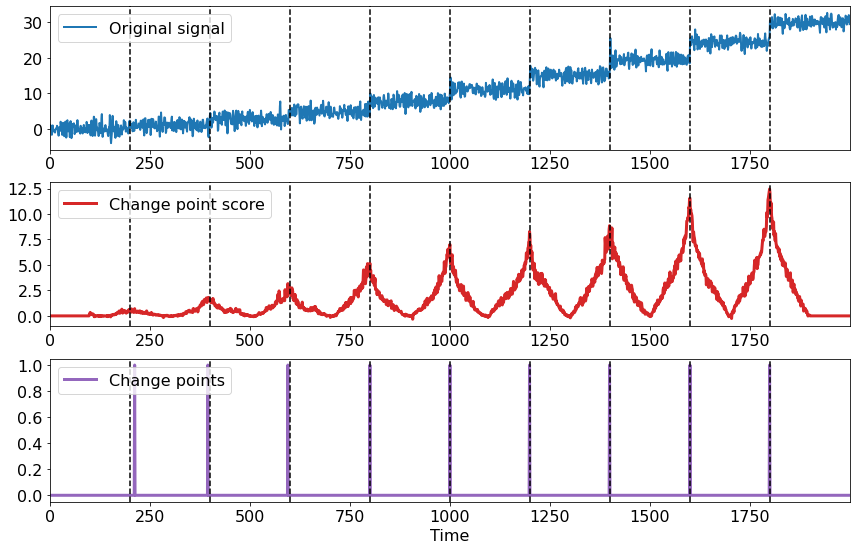

In [1]:
import roerich
from roerich.algorithms import ChangePointDetectionClassifier

# generate time series
X, cps_true = roerich.generate_dataset(period=200, N_tot=2000)

# detection
cpd = ChangePointDetectionClassifier()
score, cps_pred = cpd.predict(X)

# visualization
roerich.display(X, cps_true, score, cps_pred)

## CV

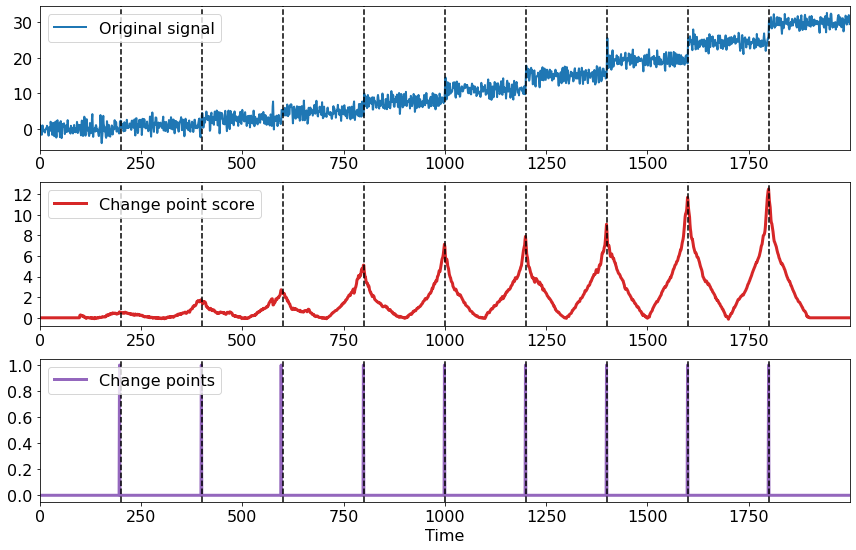

In [2]:
from roerich.algorithms import ChangePointDetectionClassifierCV

cpd = ChangePointDetectionClassifierCV(n_splits=5)
score, cps_pred = cpd.predict(X)

# visualization
roerich.display(X, cps_true, score, cps_pred)